In [1]:
psrname='J1909-3744'

In [2]:
epta_dir='/media/root1/3PAR/sdandapat/posteriors/EPTA-ONLY/SPNA/'+psrname+'/'
einpta_dir='/media/root1/3PAR/sdandapat/posteriors/EPTA+INPTA/SPNA/'+psrname+'/'

In [3]:
import os
dirs=[epta_dir,einpta_dir]
for hh in range(len(dirs)):
    
    with os.scandir(dirs[hh]) as entries:
        for entry in entries:
            dirs[hh]=dirs[hh]+entry.name+'/ptmcmc/'
epta_dir,einpta_dir=dirs

In [5]:
%matplotlib inline
import sys, os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'../..')))
from getdist import plots, MCSamples
from getdist.gaussian_mixtures import GaussianND
import getdist
getdist.chains.print_load_details = False
import scipy
import matplotlib.pyplot as plt
import IPython
from IPython.display import Markdown
import numpy as np
import seaborn as sns
# import the tensiometer tools that we need:
import tensiometer
from tensiometer import utilities
from tensiometer import gaussian_tension
from tensiometer import mcmc_tension
import pandas as pd
sys.path.append('/media/root1/3PAR/sdandapat/work_dir')
from diff_chain import  Diff_chain_shift

In [6]:
epta_1=np.loadtxt(epta_dir+'chain_1.txt')
par_epta=pd.read_csv(epta_dir+'pars.txt', header = None)
lep=len(par_epta)
epta_2=epta_1.T

In [7]:
einpta_1=np.loadtxt(einpta_dir+'chain_1.txt')
par_einpta=pd.read_csv(einpta_dir+'pars.txt', header = None)
leinp=len(par_einpta)
einpta_2=einpta_1.T

In [9]:
epta_arr=[epta_2[lep-1],epta_2[lep-2],epta_2[lep-3],epta_2[lep-4]]

einpta_arr=[einpta_2[leinp-1],einpta_2[leinp-2],einpta_2[leinp-3],einpta_2[leinp-4]]

epta_arr_red=epta_arr[0:2]; epta_arr_dm=epta_arr[2:4]
einpta_arr_red=einpta_arr[0:2]; einpta_arr_dm=einpta_arr[2:4]

# Tension Considering red+dm

In [11]:
names = ['rn_logA','rn_gamma','dm_logA','dm_gamma']
labels=['\log A_R','\gamma_R', '\log A_{DM}','\gamma_{DM}']
del_names=['delta_logA','delta_gamma']

epta=MCSamples(samples=np.array(epta_arr).transpose(),loglikes=epta_2[-3],names=names,labels=labels,label='EPTA')
einpta=MCSamples(samples=np.array(einpta_arr).transpose(),loglikes=einpta_2[-3],names = names,labels=labels,label='EPTA+INPTA \n'+psrname)

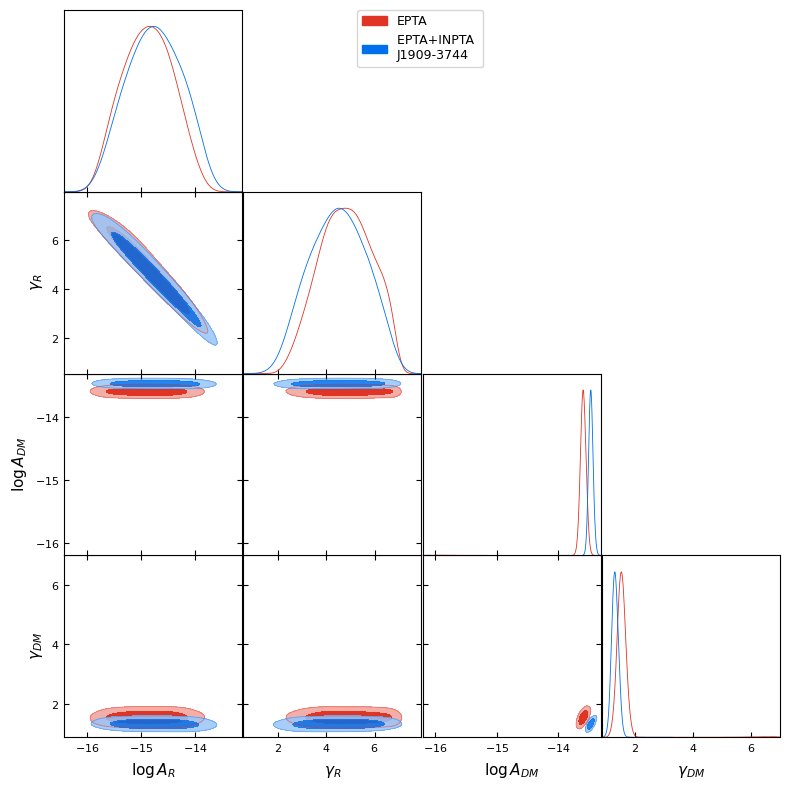

In [12]:
%matplotlib inline
g = plots.get_subplot_plotter()
g.triangle_plot([epta,einpta], filled=True)
plt.savefig(psrname+'_R_DM_SPNA_All.png',dpi=300)
plt.show()

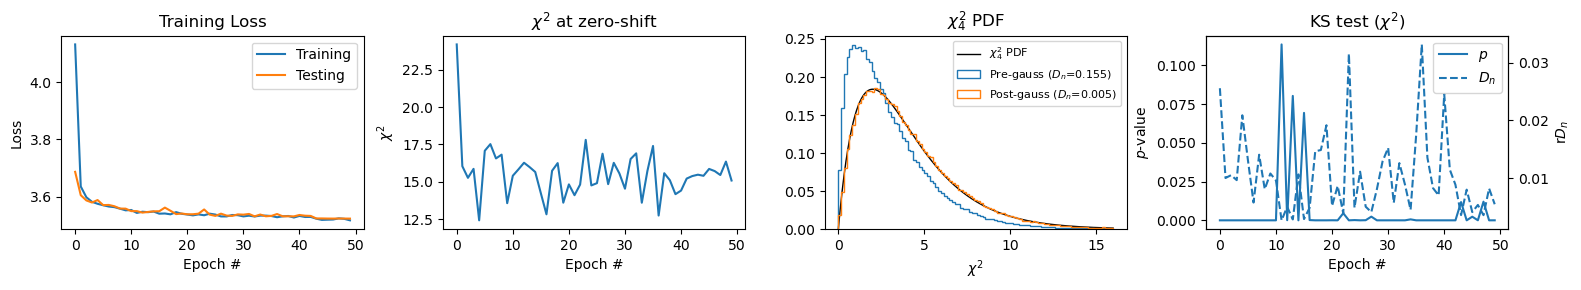

64/64 [==============================] - 5s 78ms/step - loss: 3.5167 - val_loss: 3.5227 - shift0_chi2: 15.0954 - shift0_pval: 0.9955 - shift0_nsigma: 2.8403 - chi2Z_ks: 0.0055 - chi2Z_ks_p: 1.3048e-05 - lr: 1.0000e-03


In [13]:
%matplotlib inline
diff_chain, nsig, low,high=Diff_chain_shift(epta,einpta)

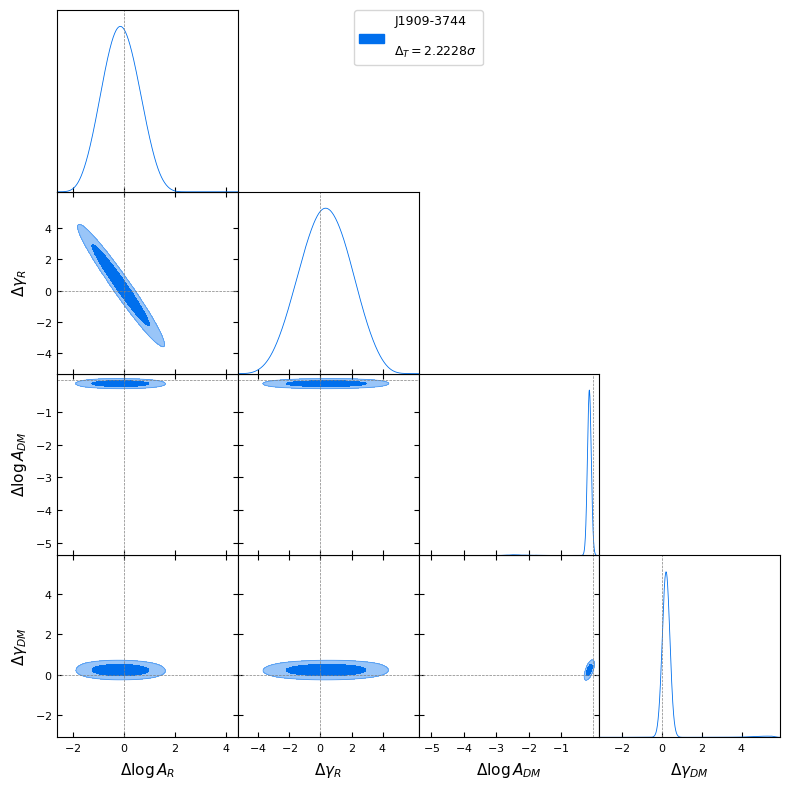

In [15]:
%matplotlib inline
g = plots.get_subplot_plotter()
#nsig=utilities.from_confidence_to_sigma(shift_probability)
#getdist.plots.GetDistPlotSettings()
g.triangle_plot(diff_chain, filled=True,legend_labels = [psrname+'\n\n$\Delta_T=$'+
                        str("{:.4f}".format(nsig))+'$\sigma$'],markers=[0,0,0,0])
#g.add_label(['$\Delta=$'+str("{:.2f}".format(nsig))+'$\sigma$'], colored_text=True)
plt.savefig(psrname+'_diff_EPTA_All.png',dpi=300)

# Tension considering red noise Only

In [16]:
names_r = ['rn_logA','rn_gamma']
labels_r=['\log A_R','\gamma_R']

epta_red=MCSamples(samples=np.array(epta_arr_red).transpose(),loglikes=epta_2[-3],names=names_r,labels=labels_r,label='EPTA')
einpta_red=MCSamples(samples=np.array(einpta_arr_red).transpose(),loglikes=einpta_2[-3],names = names_r,labels=labels_r,label='EPTA+INPTA \n'+psrname)

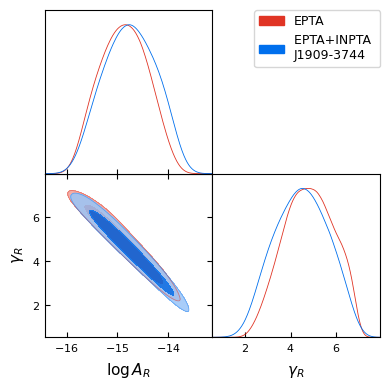

In [17]:
%matplotlib inline
g = plots.get_subplot_plotter()
g.triangle_plot([epta_red,einpta_red], filled=True)
plt.savefig(psrname+'_R_DM_SPNA_red.png',dpi=300)
plt.show()

In [18]:
names_dm = ['dm_logA','dm_gamma']
labels_dm=['\log A_{DM}','\gamma_{DM}']

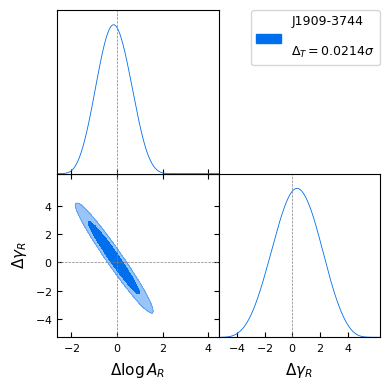

In [19]:
%matplotlib inline
diff_chain_r, shift_probability_r, pl_r, pu_r=Diff_chain_shift(epta_red,einpta_red)
g = plots.get_subplot_plotter()
nsig_r=utilities.from_confidence_to_sigma(shift_probability_r)
#getdist.plots.GetDistPlotSettings()
g.triangle_plot(diff_chain_r, filled=True,legend_labels = [psrname+'\n\n$\Delta_T=$'+
                        str("{:.4f}".format(nsig_r))+'$\sigma$'],markers=[0,0,0,0])
#g.add_label(['$\Delta=$'+str("{:.2f}".format(nsig))+'$\sigma$'], colored_text=True)
plt.savefig(psrname+'_diff_SPNA_red.png',dpi=300)

# Tension considering dm noise only

In [20]:
epta_dm=MCSamples(samples=np.array(epta_arr_dm).transpose(),loglikes=epta_2[-3],names=names_dm,labels=labels_dm,label='EPTA')
einpta_dm=MCSamples(samples=np.array(einpta_arr_dm).transpose(),loglikes=einpta_2[-3],names = names_dm,labels=labels_dm,label='EPTA+INPTA \n'+psrname)

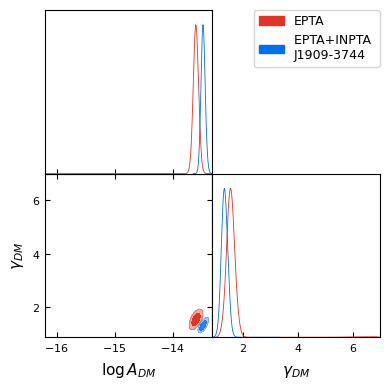

In [21]:
%matplotlib inline
g = plots.get_subplot_plotter()
g.triangle_plot([epta_dm,einpta_dm], filled=True)
plt.savefig(psrname+'_SPNA_dm.png',dpi=300)
plt.show()

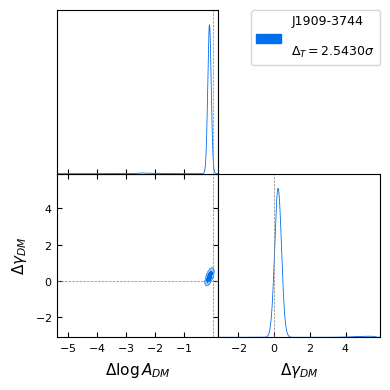

In [22]:
%matplotlib inline
diff_chain_dm, nsig_dm, chi_2_dm, D_B_dm=Diff_chain_shift(epta_dm,einpta_dm)
g = plots.get_subplot_plotter()
#nsig=utilities.from_confidence_to_sigma(shift_probability)
#getdist.plots.GetDistPlotSettings()
g.triangle_plot(diff_chain_dm, filled=True,legend_labels = [psrname+'\n\n$\Delta_T=$'+
                        str("{:.4f}".format(nsig_dm))+'$\sigma$'],markers=[0,0,0,0])
#g.add_label(['$\Delta=$'+str("{:.2f}".format(nsig))+'$\sigma$'], colodm_text=True)
plt.savefig(psrname+'_diff_EPTA_dm.png',dpi=300)